# Read the dataset from the CSV file

In [7]:
import numpy as np
import pandas as pd

df = pd.read_csv("C:/Users/IliaMalfa/Desktop/MachineLearnignAssigment1/day.csv", index_col=None)
# convert dates from 1/1/2011 to 112011
df.dteday = [s.replace('/', '') for s in df.dteday]
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Initialize Dataframes
#### I removed the instant column becuase is the index of the table, and the columns registered and casual because they sum up to cnt

In [14]:
decisionTreeDataframe = df[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
                           'temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()

linearRegressionDataframe =  df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()

logisticRegressionDataframe =  df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()

## a) Classification

In [17]:
X = decisionTreeDataframe.copy()
# remove the cnt from the data
del X["cnt"]

# I tested the outcome tree with 2,3,4,5 classes
# I decided that the optimal cut fot the cnt is in 3 parts because it gave me better results
y = pd.cut(decisionTreeDataframe.cnt, 3, labels=["A", "B", "C"], ordered=True)


feature_names = list(X.columns)
print(X)
print(y)

       dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0      112011       1   0     1        0        6           0           2   
1      122011       1   0     1        0        0           0           2   
2      132011       1   0     1        0        1           1           1   
3      142011       1   0     1        0        2           1           1   
4      152011       1   0     1        0        3           1           1   
..        ...     ...  ..   ...      ...      ...         ...         ...   
726  12272012       1   1    12        0        4           1           2   
727  12282012       1   1    12        0        5           1           2   
728  12292012       1   1    12        0        6           0           2   
729  12302012       1   1    12        0        0           0           1   
730  12312012       1   1    12        0        1           1           2   

         temp     atemp       hum  windspeed  
0    0.344167  0.363625  0.8

In [19]:
from sklearn.model_selection import train_test_split

# Creation of train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Evaluation of decision tree performance based on train and test sets with different tree depths

>1, train: 0.523, test: 0.500
>2, train: 0.796, test: 0.791
>3, train: 0.879, test: 0.859
>4, train: 0.898, test: 0.855
>5, train: 0.922, test: 0.864
>6, train: 0.947, test: 0.868
>7, train: 0.957, test: 0.864
>8, train: 0.967, test: 0.850
>9, train: 0.980, test: 0.850
>10, train: 0.992, test: 0.850
>11, train: 0.996, test: 0.845
>12, train: 0.998, test: 0.850
>13, train: 0.998, test: 0.836
>14, train: 1.000, test: 0.845
>15, train: 1.000, test: 0.850
>16, train: 1.000, test: 0.845
>17, train: 1.000, test: 0.832
>18, train: 1.000, test: 0.864
>19, train: 1.000, test: 0.845
>20, train: 1.000, test: 0.823


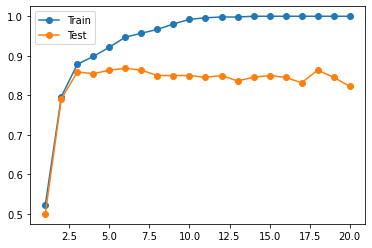

In [40]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 21)]

# evaluate a decision tree for each depth
for i in values:
       
    # As the selection measure I choose gini because it has better accuracy than entropy 
    # and the overfiting occurres in bigger depth of the tree
    
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, y_train)
    
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
    
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [34]:
# Based on the diagram above I decided that the best depth for the tree is 3 ensuring that overfiting has not occurred
from sklearn import tree

dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)
print(feature_names)
text_representation = tree.export_text(dtree, feature_names=feature_names)
print(text_representation)

['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
|--- temp <= 0.44
|   |--- yr <= 0.50
|   |   |--- season <= 3.00
|   |   |   |--- class: A
|   |   |--- season >  3.00
|   |   |   |--- class: B
|   |--- yr >  0.50
|   |   |--- atemp <= 0.27
|   |   |   |--- class: A
|   |   |--- atemp >  0.27
|   |   |   |--- class: B
|--- temp >  0.44
|   |--- yr <= 0.50
|   |   |--- weathersit <= 2.50
|   |   |   |--- class: B
|   |   |--- weathersit >  2.50
|   |   |   |--- class: A
|   |--- yr >  0.50
|   |   |--- hum <= 0.81
|   |   |   |--- class: C
|   |   |--- hum >  0.81
|   |   |   |--- class: B



### The most prominent features are temp and yr

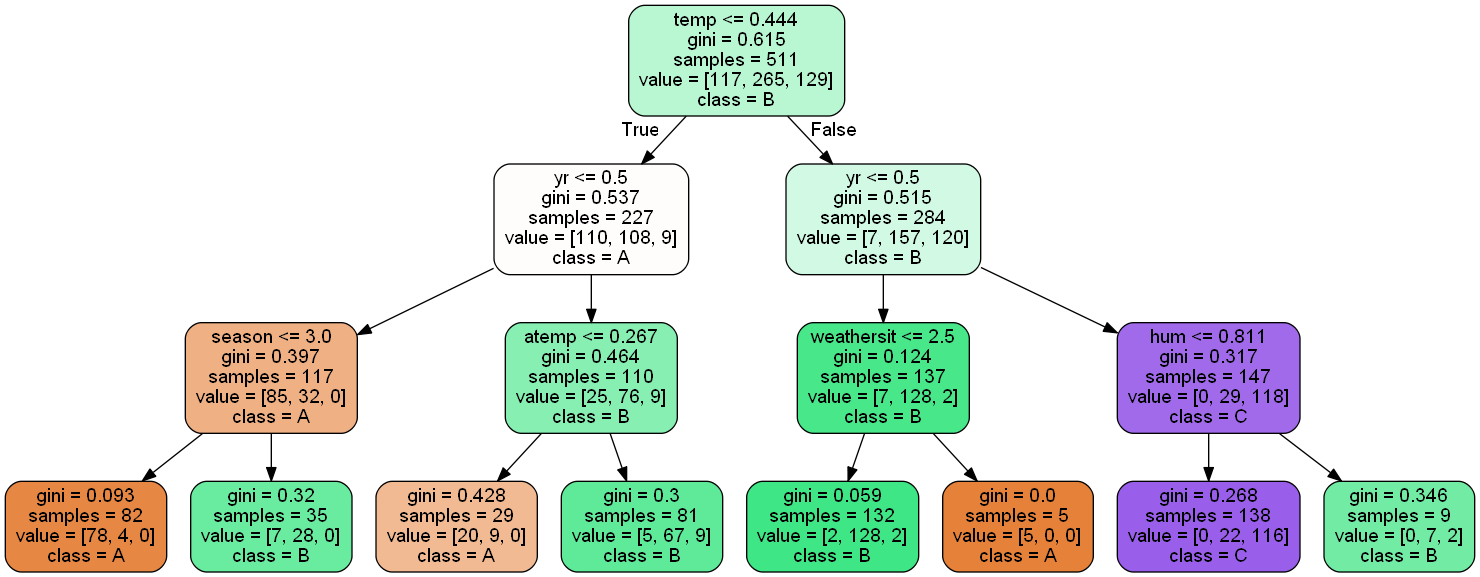

In [35]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



export_graphviz(dtree, 
                out_file='tree.dot', 
                feature_names=feature_names)

dot_data = export_graphviz(
    dtree, 
    out_file=None,
    feature_names=feature_names,
    class_names = ['A', 'B', 'C'],
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


## a) Linear Regression